## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [73]:
from keras.layers import Dropout

def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],drop_ratio=0.2):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            x = keras.layers.Dense(units=n_units,activation='relu')(x)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
            x = keras.layers.Dense(units=n_units,activation='relu')(x)
            x = keras.layers.Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    
    return model

In [50]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
BATCH_SIZE = 256
EPOCHS = 50
MOMENTUM = 0.95
Dropout_EXP = 0.35

In [74]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:],drop_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
__________

50000/50000 [==============================] - 11s 220us/step - loss: 1.1606 - acc: 0.5896 - val_loss: 1.4064 - val_acc: 0.5202
Epoch 47/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.1462 - acc: 0.5927 - val_loss: 1.4121 - val_acc: 0.5211
Epoch 48/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1439 - acc: 0.5938 - val_loss: 1.4278 - val_acc: 0.5063
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.1312 - acc: 0.5977 - val_loss: 1.4220 - val_acc: 0.5179
Epoch 50/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.1268 - acc: 0.5983 - val_loss: 1.4142 - val_acc: 0.5196


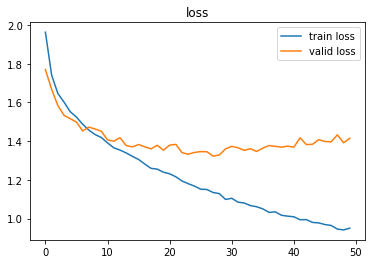

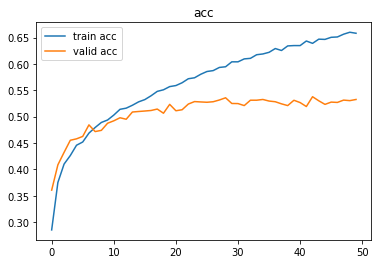

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)),train_loss,label='train loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid acc')
plt.legend()
plt.title('acc')
plt.show()

In [85]:
from keras.layers import Dropout

def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],drop_ratio=0.2):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
           # x = keras.layers.Dense(units=n_units,activation='relu')(x)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
          #  x = keras.layers.Dense(units=n_units,activation='relu')(x)
            x = keras.layers.Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    
    return model

In [86]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
BATCH_SIZE = 256
EPOCHS = 50
MOMENTUM = 0.95
Dropout_EXP = 0.0001

In [87]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:],drop_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['acc']
valid_acc = model.history.history['val_acc']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_72 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
__________

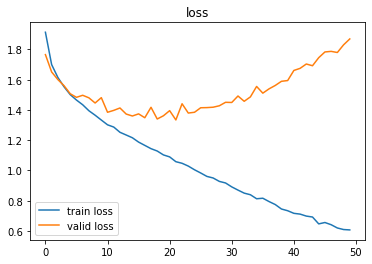

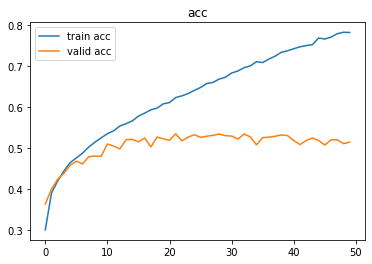

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)),train_loss,label='train loss')
plt.plot(range(len(valid_loss)),valid_loss,label='valid loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(range(len(train_acc)),train_acc,label='train acc')
plt.plot(range(len(valid_acc)),valid_acc,label='valid acc')
plt.legend()
plt.title('acc')
plt.show()